<a href="https://colab.research.google.com/github/KhantPhyo/Machine-Learning-with-Python---Scikit-Learn/blob/main/Sk2%20sklearn_estimator_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_estimator_api.htm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [ ]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [ ]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

for this regression example, we are going to use the following sample data

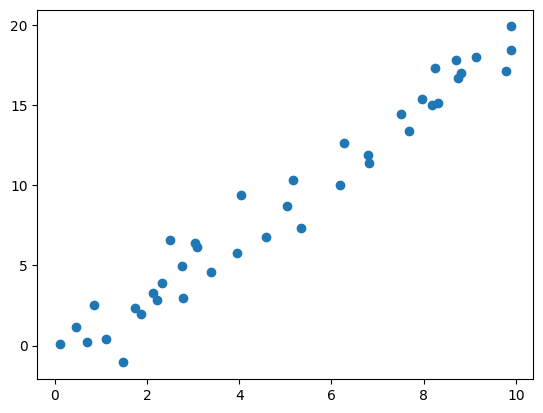

In [ ]:
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40) # y = mx + c
plt.scatter(x,y);

model = LinearRegression(fit_intercept=True): You've created an instance of the LinearRegression class and assigned it to the variable model. The parameter fit_intercept=True indicates that you want the model to fit an intercept term in addition to the coefficients for the features. The intercept represents the value of the dependent variable when all independent variables are zero.

In [ ]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [ ]:
x.shape, x.ndim

((40,), 1)

Now, as we know that our target variable y is in correct form i.e. a length n_samples array of 1-D. But, we need to reshape the feature matrix X to make it a matrix of size [n_samples, n_features]. It can be done as follows

In [ ]:
X = x[:, np.newaxis]
X.shape, X.ndim

((40, 1), 2)

    model.fit(X, y): This line is fitting a linear regression model to the data. Here's what's happening in more detail:

    model is the instance of the LinearRegression class that you created earlier.
    X is the feature matrix, which is a single-column array in this case.
    y is the target variable, which represents the dependent variable that you want to predict.
    model.fit(X, y) trains the linear regression model using the data provided in X and y. Specifically, it calculates the coefficients (slope and intercept) that minimize the mean squared error between the predicted values (based on the linear equation) and the actual values in y.

After fitting the model, you can use it to make predictions or further analyze the relationship between x and y using the learned coefficients.

In [ ]:
model.fit(X, y)

LinearRegression()

model.coef_:

    coef_ is an attribute that returns an array of coefficients for each feature in the linear regression model.
    In the context of a simple linear regression model (where there is only one feature), coef_ represents the slope of the linear equation. For multiple linear regression (with multiple features), coef_ provides the coefficients associated with each feature.
    These coefficients indicate the change in the target variable for a one-unit change in the corresponding feature while holding all other features constant.
    For example, if you have a multiple linear regression model with features like sepal length, sepal width, and petal length, model.coef_ will provide the coefficients for each of these features, showing how they contribute to the prediction of the target variable.

In [ ]:
#slope m
model.coef_

array([1.99839352])

model.intercept_:

    intercept_ is an attribute that returns the intercept (bias) term of the linear regression model.
    In a simple linear regression model, the intercept represents the value of the target variable when all the features are zero. It's the point where the regression line intersects the y-axis.
    In multiple linear regression, the intercept still represents the value of the target variable when all features are zero, but it accounts for the combined effect of all features.
    The intercept is essential as it allows the linear model to capture the baseline value of the target variable, even when the features are not zero.

In [ ]:
#y intecpt => c , y = 1.99839352*x - 0.989545945777504, actual : y = 2*x-1+rng.randn(40)
model.intercept_

-0.989545945777504

In [ ]:
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
xfit = np.linspace(-1, 11)
xfit.shape, xfit.ndim

((50,), 1)

In [ ]:
Xfit = xfit[:, np.newaxis]
Xfit.shape, Xfit.ndim

((50, 1), 2)

In [ ]:
yfit = model.predict(Xfit)
yfit.shape

(50,)

After training the model, we can apply it to new data. As the main task of supervised machine learning is to evaluate the model based on new data that is not the part of the training set. It can be done with the help of predict() method as follows

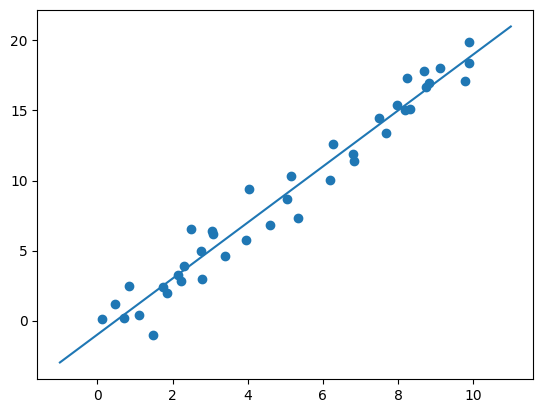

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Here, as an example of this process we are taking common case of reducing the dimensionality of the Iris dataset so that we can visualize it more easily. For this example, we are going to use principal component analysis (PCA), a fast-linear dimensionality reduction technique.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
model = PCA(n_components=2)
model

PCA(n_components=2)

In [ ]:
model.fit(X_iris)

PCA(n_components=2)

In [ ]:
X_2D = model.transform(X_iris)
X_2D.shape

(150, 2)

In [ ]:
type(X_2D)

numpy.ndarray

In [ ]:
X_2D[0]

array([-2.68412563,  0.31939725])

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
PCA1            float64
PCA2            float64
dtype: object

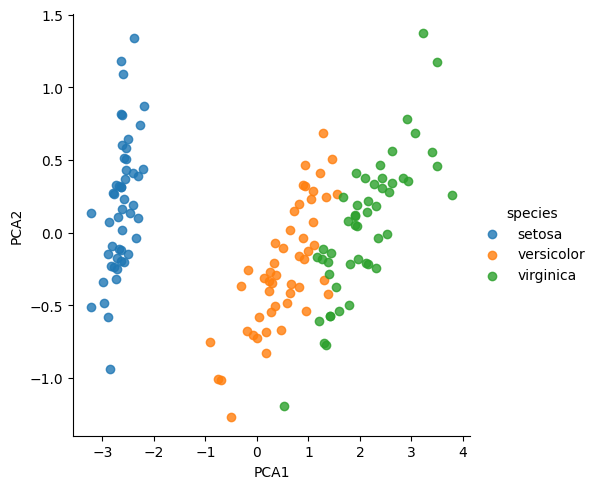

In [ ]:
sns.lmplot(x="PCA1", y="PCA2", hue = 'species', data = iris, fit_reg = False);

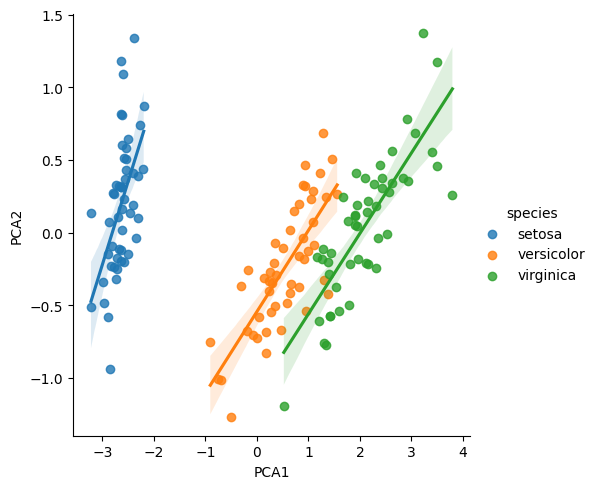

In [ ]:
sns.lmplot(x="PCA1", y="PCA2", hue = 'species', data = iris);